In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data= pd.read_csv('BankChurners.csv',na_values='NaN')

In [4]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<AxesSubplot:>

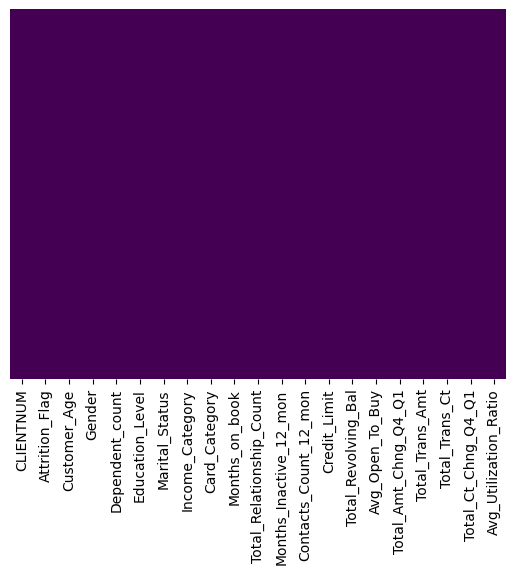

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
data=data.drop('CLIENTNUM',axis=1)

In [13]:
data.dropna(subset=['Marital_Status'],inplace=True)

In [14]:
data.shape

(10127, 20)

In [15]:
data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [17]:
mode_educational_level=data['Education_Level'].mode()[0]
data['Education_Level'].fillna(mode_educational_level,inplace=True)

In [18]:
data.shape

(10127, 20)

In [19]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [21]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [22]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [23]:
data['Income_Category']=data['Income_Category'].replace('abc',np.nan)

mode_income_category=data['Income_Category'].mode()[0]
data['Income_Category']=data['Income_Category'].fillna(mode_income_category)

In [24]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [25]:
data.shape

(10127, 20)

In [26]:
data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [27]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').column}

AttributeError: 'DataFrame' object has no attribute 'column'

In [28]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [29]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [32]:
def binary_encoding(df,column,positive_value):
    df=df.copy()
    df[column]=df[column].apply(lambda x:1 if x == positive_value else 0)
    return df

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

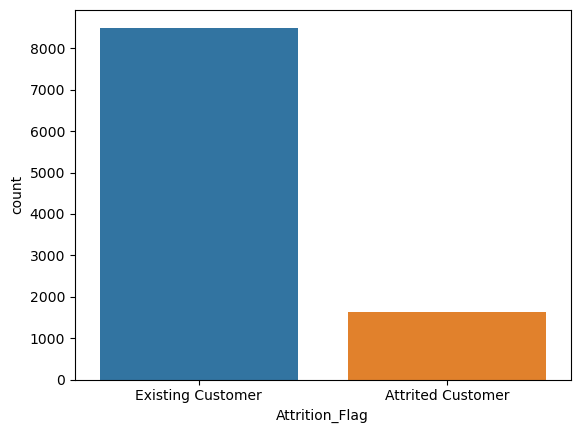

In [34]:
sns.countplot(x= 'Attrition_Flag', data=data)

In [35]:
data = binary_encoding(data,column='Attrition_Flag',positive_value='Attrited Customer')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

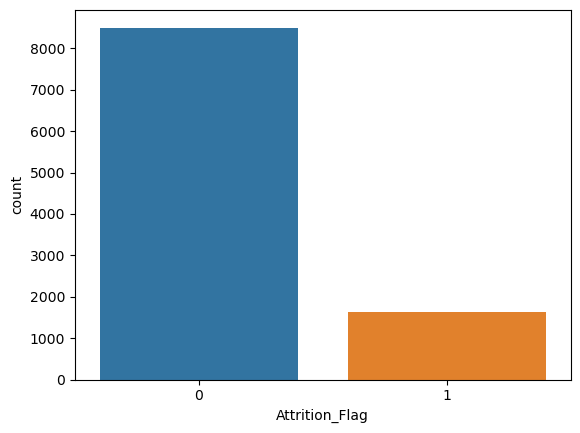

In [36]:
sns.countplot(x='Attrition_Flag', data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

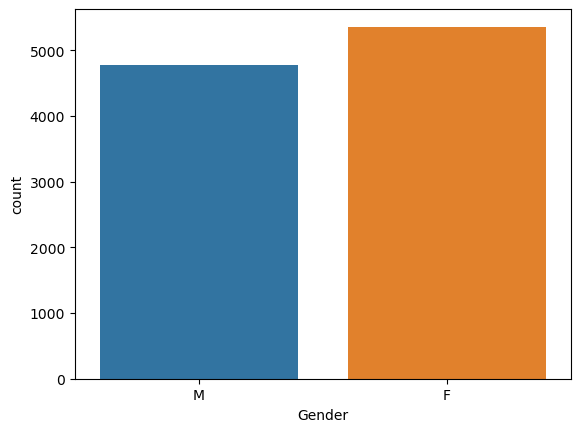

In [37]:
sns.countplot(x='Gender',data=data)

In [38]:
data = binary_encoding(data,column='Gender',positive_value='M')

<AxesSubplot:xlabel='Gender', ylabel='count'>

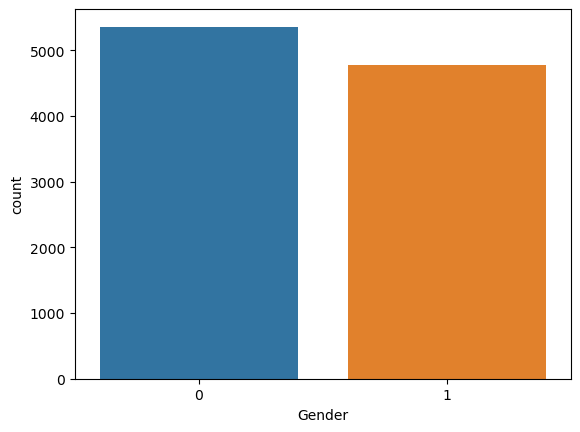

In [39]:
sns.countplot(x='Gender',data=data)

In [40]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

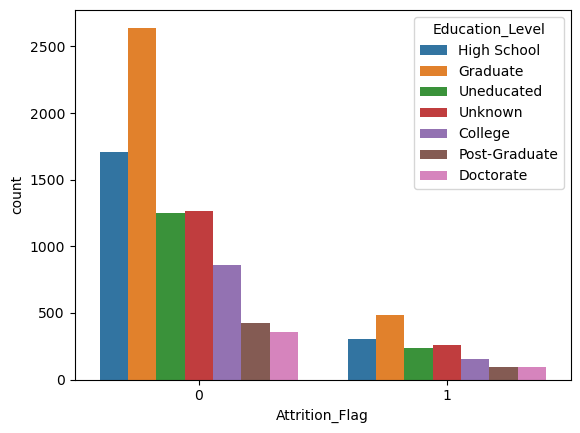

In [42]:
sns.countplot(x='Attrition_Flag',hue='Education_Level',data=data)

In [43]:
len(data['Education_Level'].value_counts())

7

In [44]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [46]:
def add_education_level(inpt):
    if inpt == 'Post-Graduate' or inpt == 'Doctorate':
        return 'Other'
    else: 
        return inpt

In [48]:
data['Education_Level']=data['Education_Level'].apply(add_education_level)

In [49]:
data['Education_Level'].value_counts()

Graduate       3128
High School    2013
Unknown        1519
Uneducated     1487
College        1013
Other           967
Name: Education_Level, dtype: int64

In [51]:
data=pd.get_dummies(data,columns=['Education_Level'])

In [52]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Graduate,Education_Level_High School,Education_Level_Other,Education_Level_Uneducated,Education_Level_Unknown
0,0,45,1,3,Married,$60K - $80K,Blue,39,5,1,...,1144,42,1.625,0.061,0,0,1,0,0,0
1,0,49,0,5,Single,Less than $40K,Blue,44,6,1,...,1291,33,3.714,0.105,0,1,0,0,0,0
2,0,51,1,3,Married,$80K - $120K,Blue,36,4,1,...,1887,20,2.333,0.000,0,1,0,0,0,0
3,0,40,0,4,Unknown,Less than $40K,Blue,34,3,4,...,1171,20,2.333,0.760,0,0,1,0,0,0
4,0,40,1,3,Married,$60K - $80K,Blue,21,5,1,...,816,28,2.500,0.000,0,0,0,0,1,0


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

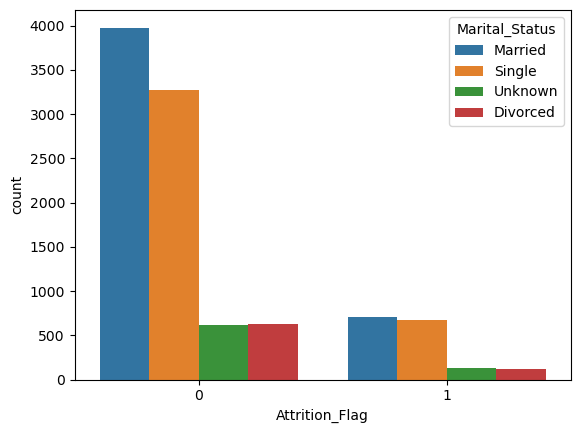

In [53]:
sns.countplot(x='Attrition_Flag',hue='Marital_Status',data=data)

In [54]:
len(data['Marital_Status'].value_counts())

4

In [55]:
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [56]:
def prepocess_marital_status(data):
    
    maritial_dummies = pd.get_dummies(data['Marital_Status'])
    
    data=pd.concat([data,maritial_dummies],axis=1)
    
    data.drop('Marital_Status', axis=1, inplace=True)
    return data

In [57]:
data=prepocess_marital_status(data)

In [58]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Education_Level_College,Education_Level_Graduate,Education_Level_High School,Education_Level_Other,Education_Level_Uneducated,Education_Level_Unknown,Divorced,Married,Single,Unknown
0,0,45,1,3,$60K - $80K,Blue,39,5,1,3,...,0,0,1,0,0,0,0,1,0,0
1,0,49,0,5,Less than $40K,Blue,44,6,1,2,...,0,1,0,0,0,0,0,0,1,0
2,0,51,1,3,$80K - $120K,Blue,36,4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,40,0,4,Less than $40K,Blue,34,3,4,1,...,0,0,1,0,0,0,0,0,0,1
4,0,40,1,3,$60K - $80K,Blue,21,5,1,0,...,0,0,0,0,1,0,0,1,0,0


In [59]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

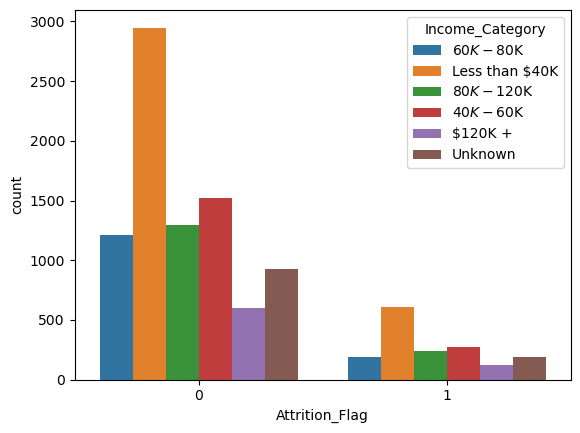

In [62]:
sns.countplot(x='Attrition_Flag',hue='Income_Category',data=data)

In [65]:
def prepocess_income_category(data):
    income_map={'Less than $40K':0,'$40K - $60K':1,'$80K - $120K':2,'$60K - $80K':3,'$120K +':4,'Unknown':5}
    
    data['Income_Category']=data['Income_Category'].apply(lambda x: income_map[x])
    
    return data

In [66]:
data=prepocess_income_category(data)

In [67]:
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Education_Level_College,Education_Level_Graduate,Education_Level_High School,Education_Level_Other,Education_Level_Uneducated,Education_Level_Unknown,Divorced,Married,Single,Unknown
0,0,45,1,3,3,Blue,39,5,1,3,...,0,0,1,0,0,0,0,1,0,0
1,0,49,0,5,0,Blue,44,6,1,2,...,0,1,0,0,0,0,0,0,1,0
2,0,51,1,3,2,Blue,36,4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,40,0,4,0,Blue,34,3,4,1,...,0,0,1,0,0,0,0,0,0,1
4,0,40,1,3,3,Blue,21,5,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,1,Blue,40,3,2,3,...,0,1,0,0,0,0,0,0,1,0
10123,1,41,1,2,1,Blue,25,4,2,3,...,0,0,0,0,0,1,1,0,0,0
10124,1,44,0,1,0,Blue,36,5,3,4,...,0,0,1,0,0,0,0,1,0,0
10125,1,30,1,2,1,Blue,36,4,3,3,...,0,1,0,0,0,0,0,0,0,1


In [68]:
data['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

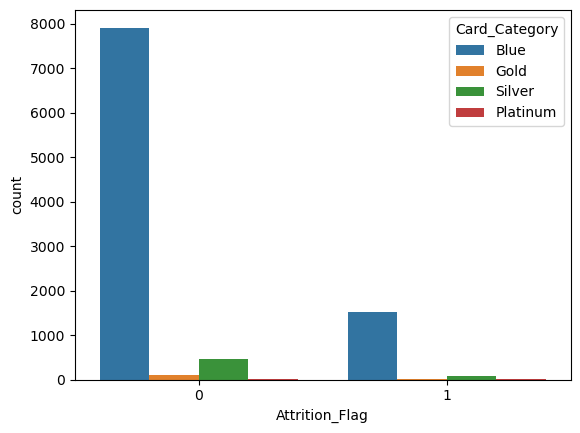

In [69]:
sns.countplot(x='Attrition_Flag',hue='Card_Category',data=data)

In [72]:
def prepocess_card_category(data):
    data=pd.get_dummies(data,columns=['Card_Category'])
    
    return data

In [73]:
data= prepocess_card_category(data)

In [74]:
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Education_Level_Uneducated,Education_Level_Unknown,Divorced,Married,Single,Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,3,39,5,1,3,12691.0,...,0,0,0,1,0,0,1,0,0,0
1,0,49,0,5,0,44,6,1,2,8256.0,...,0,0,0,0,1,0,1,0,0,0
2,0,51,1,3,2,36,4,1,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,0,4,0,34,3,4,1,3313.0,...,0,0,0,0,0,1,1,0,0,0
4,0,40,1,3,3,21,5,1,0,4716.0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,1,40,3,2,3,4003.0,...,0,0,0,0,1,0,1,0,0,0
10123,1,41,1,2,1,25,4,2,3,4277.0,...,0,1,1,0,0,0,1,0,0,0
10124,1,44,0,1,0,36,5,3,4,5409.0,...,0,0,0,1,0,0,1,0,0,0
10125,1,30,1,2,1,36,4,3,3,5281.0,...,0,0,0,0,0,1,1,0,0,0


In [75]:
data.shape

(10127, 31)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Attrition_Flag               10127 non-null  int64  
 1   Customer_Age                 10127 non-null  int64  
 2   Gender                       10127 non-null  int64  
 3   Dependent_count              10127 non-null  int64  
 4   Income_Category              10127 non-null  int64  
 5   Months_on_book               10127 non-null  int64  
 6   Total_Relationship_Count     10127 non-null  int64  
 7   Months_Inactive_12_mon       10127 non-null  int64  
 8   Contacts_Count_12_mon        10127 non-null  int64  
 9   Credit_Limit                 10127 non-null  float64
 10  Total_Revolving_Bal          10127 non-null  int64  
 11  Avg_Open_To_Buy              10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1         10127 non-null  float64
 13  Total_Trans_Amt 

In [77]:
# Assuming df is your DataFrame and col1, col2 are the columns you want to drop
data = data.drop(columns=['Education_Level_Unknown', 'Unknown'])


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Attrition_Flag               10127 non-null  int64  
 1   Customer_Age                 10127 non-null  int64  
 2   Gender                       10127 non-null  int64  
 3   Dependent_count              10127 non-null  int64  
 4   Income_Category              10127 non-null  int64  
 5   Months_on_book               10127 non-null  int64  
 6   Total_Relationship_Count     10127 non-null  int64  
 7   Months_Inactive_12_mon       10127 non-null  int64  
 8   Contacts_Count_12_mon        10127 non-null  int64  
 9   Credit_Limit                 10127 non-null  float64
 10  Total_Revolving_Bal          10127 non-null  int64  
 11  Avg_Open_To_Buy              10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1         10127 non-null  float64
 13  Total_Trans_Amt 

In [80]:
x=data.drop(['Attrition_Flag'],axis=1)

y=data['Attrition_Flag']

In [90]:
scaler=StandardScaler()

In [91]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [92]:
x

,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_High School,Education_Level_Other,Education_Level_Uneducated,Divorced,Married,Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,1.059956,0.503368,0.741751,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,...,2.007685,-0.324912,-0.414857,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
1,0.333570,-0.943436,2.043199,-1.012366,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,...,-0.498086,-0.324912,-0.414857,-0.282405,-0.928214,1.252337,0.270611,-0.107644,-0.044484,-0.240794
2,0.583058,1.059956,0.503368,0.157045,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,...,-0.498086,-0.324912,-0.414857,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
3,-0.789126,-0.943436,1.273283,-1.012366,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,...,2.007685,-0.324912,-0.414857,-0.282405,-0.928214,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
4,-0.789126,1.059956,0.503368,0.741751,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,...,-0.498086,-0.324912,2.410468,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,-0.427660,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,...,-0.498086,-0.324912,-0.414857,-0.282405,-0.928214,1.252337,0.270611,-0.107644,-0.044484,-0.240794
10123,-0.664382,1.059956,-0.266547,-0.427660,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,...,-0.498086,-0.324912,-0.414857,3.541013,-0.928214,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
10124,-0.290150,-0.943436,-1.036462,-1.012366,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,...,2.007685,-0.324912,-0.414857,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
10125,-2.036565,1.059956,-0.266547,-0.427660,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,...,-0.498086,-0.324912,-0.414857,-0.282405,-0.928214,-0.798507,0.270611,-0.107644,-0.044484,-0.240794


In [93]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=123)

In [96]:
models=[
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]
for model in models:
    model.fit(x_train,y_train)

In [98]:
model_names = [
    "LogisticRegression",
    "SVC",
    "DecisionTreeClassifier",
    "RandomForestClassifier"
]

for model,name in zip(models,model_names):
    print(name +": {:.4f}%".format(model.score(x_test,y_test)*100))

LogisticRegression: 90.4738%
SVC: 93.0405%
DecisionTreeClassifier: 93.4353%
RandomForestClassifier: 96.3475%


In [99]:
y_pred=models[0].predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
y_pred=models[1].predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
y_pred=models[2].predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1715
           1       0.76      0.57      0.65       311

    accuracy                           0.91      2026
   macro avg       0.84      0.77      0.80      2026
weighted avg       0.90      0.91      0.90      2026

Confusion:
[[1658   57]
 [ 134  177]]


G:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "G:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' pe

Text(113.9222222222222, 0.5, 'Predicted class')

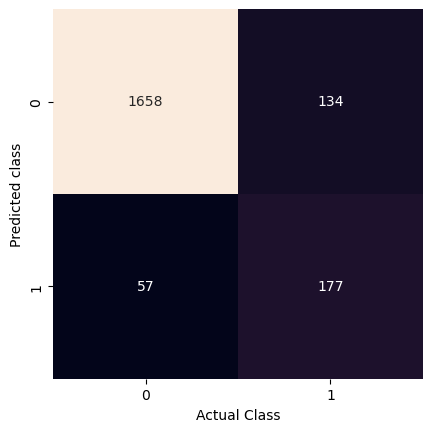

In [110]:
logreg = LogisticRegression(random_state=123)

param_grid = {'C': [0.1, 1, 10],'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(logreg, param_grid, cv=5)



grid_search.fit(x_train, y_train)

# print best hyperparameters

print("Best Hyperparameters:", grid_search.best_params_)

print("")

logreg_best = grid_search.best_estimator_

log_prediction = logreg_best.predict(x_test)
print(classification_report(y_test, log_prediction))

print("Confusion:")

cm = confusion_matrix(y_test, log_prediction)

print(cm)

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('Actual Class')

plt.ylabel('Predicted class')


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1715
           1       0.80      0.77      0.78       311

    accuracy                           0.93      2026
   macro avg       0.88      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026

Confusion Matrix:
[[1655   60]
 [  73  238]]


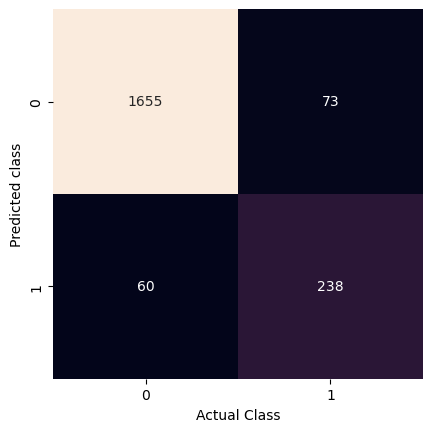

In [132]:
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

svm = SVC(random_state=123)

grid_search = GridSearchCV(svm, param_grid, cv=5)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("")

svm_best = grid_search.best_estimator_  # Note the underscore at the end
svm_prediction = svm_best.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, svm_prediction))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, svm_prediction)
print(cm)

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted class')
plt.show()


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1715
           1       0.81      0.78      0.79       311

    accuracy                           0.94      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026

Confusion Matrix:
[[1656   59]
 [  67  244]]


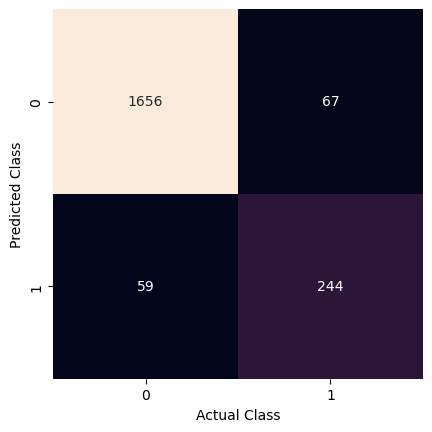

In [133]:
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

dtc = DecisionTreeClassifier(random_state=123)

grid_search = GridSearchCV(dtc, param_grid, cv=5)

grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("")

dtc_best = grid_search.best_estimator_

dtc_prediction = dtc_best.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, dtc_prediction))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, dtc_prediction)
print(cm)

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1715
           1       0.93      0.83      0.88       311

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Confusion Matrix:
[[1695   20]
 [  53  258]]


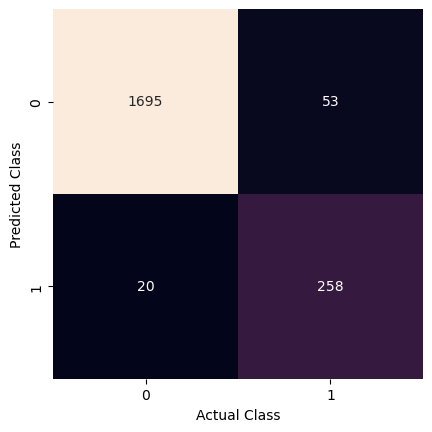

In [134]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc = RandomForestClassifier(random_state=123)

grid_search = GridSearchCV(rfc, param_grid, cv=5)

grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("")

rfc_best = grid_search.best_estimator_

rfc_prediction = rfc_best.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, rfc_prediction))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, rfc_prediction)
print(cm)

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()

In [136]:
# Save Random Forest Classifier model
import pickle
with open('Credit_Card_Customer_Churn_Prediction.pkl', 'wb') as file:
    pickle.dump(rfc_best, file)

In [141]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 4697 to 4504
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_Age                 2026 non-null   float64
 1   Gender                       2026 non-null   float64
 2   Dependent_count              2026 non-null   float64
 3   Income_Category              2026 non-null   float64
 4   Months_on_book               2026 non-null   float64
 5   Total_Relationship_Count     2026 non-null   float64
 6   Months_Inactive_12_mon       2026 non-null   float64
 7   Contacts_Count_12_mon        2026 non-null   float64
 8   Credit_Limit                 2026 non-null   float64
 9   Total_Revolving_Bal          2026 non-null   float64
 10  Avg_Open_To_Buy              2026 non-null   float64
 11  Total_Amt_Chng_Q4_Q1         2026 non-null   float64
 12  Total_Trans_Amt              2026 non-null   float64
 13  Total_Trans_Ct 